## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re

In [2]:
np.random.seed(42)

### Using the Genres datasets

Note: I took the data in the top 3 most occurring genres in my dataset. From there, I took samples of 50_000 from each genre and will be doing eda and preprocessing for those datasets here

### Importing Data

In [3]:
fiction_df = pd.read_csv('./data/fiction_sample.csv')
fiction_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,What Is the What,Gift Card Recipient,4.0,An inticing read,"What is the What shows the horrors in Sudan, l...",What Is the What is the story of Valentino Ach...,Dave Eggers,http://books.google.com/books/content?id=3HDpz...,Fiction,91.0
1,The Horde Wars: Ravenous (Book 1),"Shiloh Walker ""Shi""",5.0,"Hot action, hot heroes, amazing heroine..","Get ready for a fast, hot ride into a world we...",The Horde Wars - Ravenous By Sherri L King Boo...,Sherri L. King,http://books.google.com/books/content?id=-uADt...,Fiction,1.0


In [4]:
jvf_df = pd.read_csv('./data/jvf_sample.csv')
jvf_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,The Princess Diaries,annajlane1989,5.0,The Princess Diaries,This book is great for teenage girls who norma...,"Fourteen-year-old Mia, who is trying to lead a...",Meg Cabot,http://books.google.com/books/content?id=hRHzn...,Juvenile Fiction,80.0
1,Night,"G. E. Kugler ""Ed Kugler - nomoreBS - Author o...",5.0,Important Book - A Must Read for Now and Forever,I've never been too much into studying the Hol...,Here is the wonderful new version of the class...,Clement Moore,http://books.google.com/books/content?id=LSSyD...,Juvenile Fiction,1.0


In [5]:
bio_df = pd.read_csv('./data/bio_sample.csv')
bio_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,"Genghis Khan: Life, Death and Resurrection",P. Carey,2.0,Not a great book,Read both this book and Genghis Khan and the M...,"Genghis Khan is one of history's immortals, al...",John Man,http://books.google.com/books/content?id=0eEKA...,Biography & Autobiography,3.0
1,Queen Victoria,"Linda Baker ""quiltsbylin""",5.0,Masterful & a charming piece of true history,I went into this book after watching most of t...,Commemorating the centennial of Queen Victoria...,Christopher Hibbert,http://books.google.com/books/content?id=uWlnA...,Biography & Autobiography,5.0


In [6]:
unique_data = pd.DataFrame(columns = ['Titles', 'Authors'])
unique_data.loc['Fiction'] = [fiction_df['Title'].nunique(), fiction_df['authors'].nunique()]
unique_data.loc['Juvenile Fiction'] = [jvf_df['Title'].nunique(), jvf_df['authors'].nunique()]
unique_data.loc['Biography & Autobiography'] = [bio_df['Title'].nunique(), bio_df['authors'].nunique()]

Evaluation: Looking at the number of unique authors in each dataframe, they're very bias. For example, there are 2907 unique authors in and 4615 titles for Juvenile Fiction out of 50,000 rows of data.

In [7]:
unique_data

,Titles,Authors
Fiction,6722,3617
Juvenile Fiction,2874,1772
Biography & Autobiography,2309,1946


### Comparison of Top N-Grams

In [8]:
def my_lemmatizer(text):
    wnet = WordNetLemmatizer()
    # exclude words with apostrophes and numbers
    return [wnet.lemmatize(w) for w in text.split() if "'" not in w and not w.isdigit()]

In [9]:
wnet = WordNetLemmatizer()
lem_stopwords = [wnet.lemmatize(w) for w in stopwords.words('english')]

contractions = ['ve', 't', "'s'", 'd', 'll', 'm', 're']
lem_contractions = [wnet.lemmatize(contraction) for contraction in contractions]

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
lem_numbers = [wnet.lemmatize(num) for num in numbers]

lem_stopwords = lem_stopwords + lem_contractions + lem_numbers

In [10]:
def my_preprocessor(text):
    text = text.lower()
    text = re.sub('\\n', '', text)
    text = re.findall("[\w']+|\$[\d\.]+", text)
    text = ' '.join(text)
    
    return text

In [11]:
bigram_cvec = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=my_lemmatizer,
    preprocessor=my_preprocessor,
    ngram_range = (2,2),
    max_features = 10_000,
    token_pattern = None
    )

In [12]:
trigram_cvec = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=my_lemmatizer,
    preprocessor=my_preprocessor,
    ngram_range = (3,3),
    max_features = 10_000,
    token_pattern = None
    )

### Bigrams and Trigrams for Fiction Dataset

In [13]:
bigram_fic_desc = bigram_cvec.fit_transform(fiction_df['description'])
cv_bigram_fic_desc = pd.DataFrame(bigram_fic_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_fic_desc  = trigram_cvec.fit_transform(fiction_df['description'])
cv_trigram_fic_desc = pd.DataFrame(trigram_fic_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [14]:
bigram_fic_rev = bigram_cvec.fit_transform(fiction_df['review/text'])
cv_bigram_fic_rev = pd.DataFrame(bigram_fic_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_fic_rev  = trigram_cvec.fit_transform(fiction_df['review/text'])
cv_trigram_fic_rev = pd.DataFrame(trigram_fic_rev.todense(), columns = trigram_cvec.get_feature_names_out())

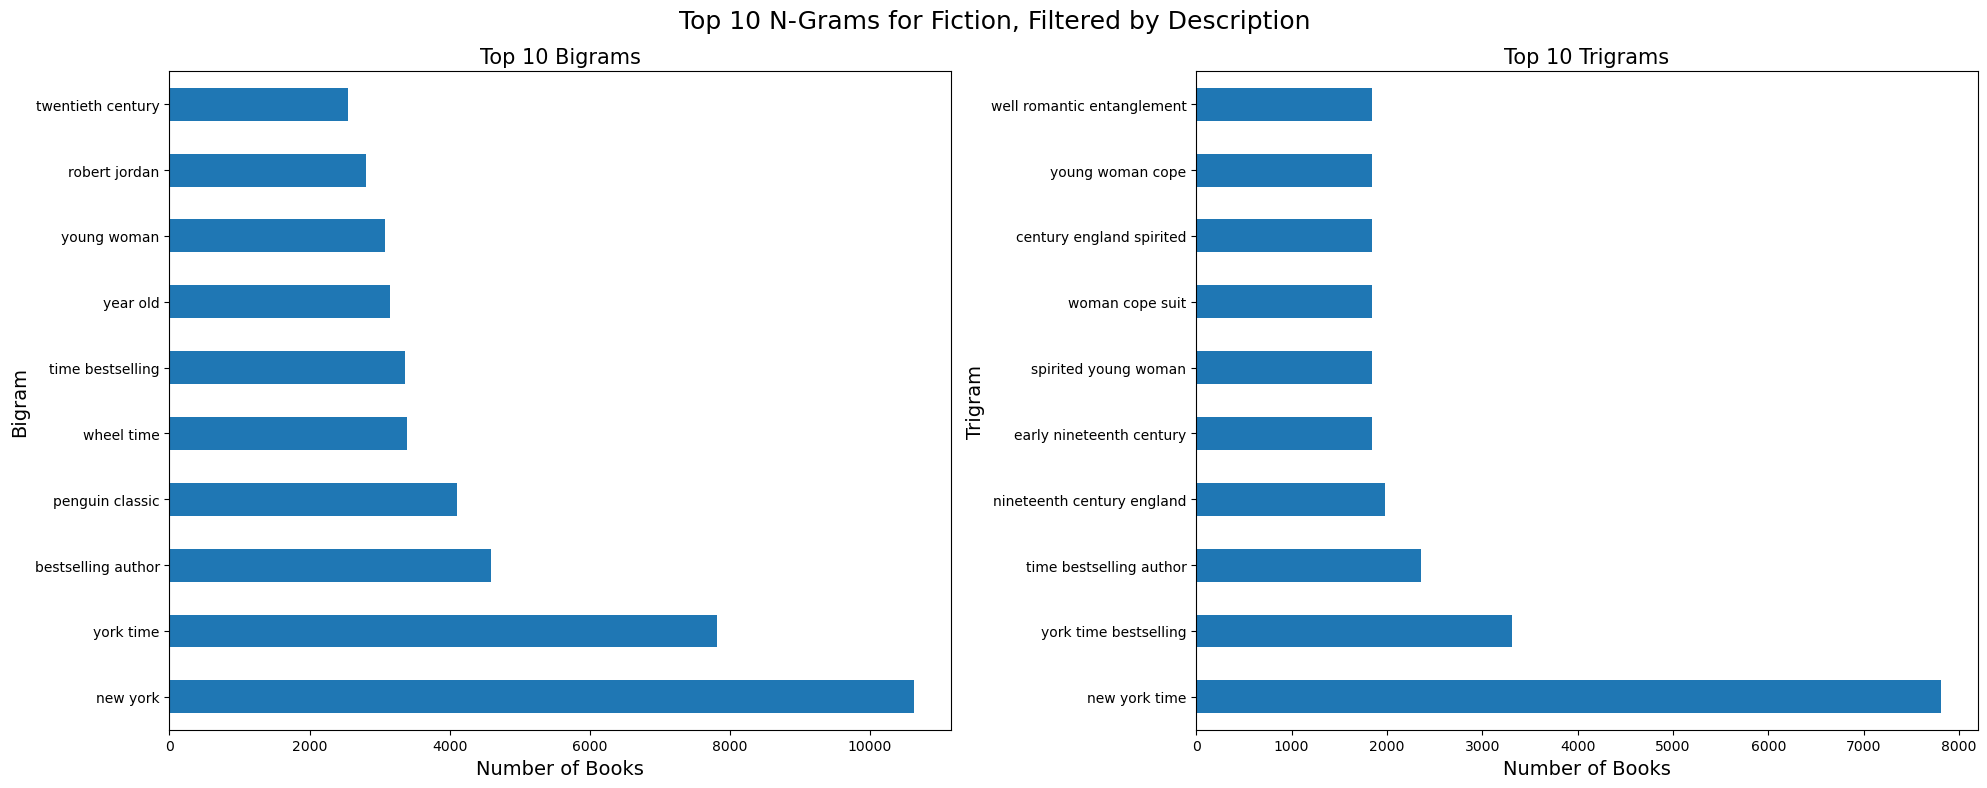

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Fiction, Filtered by Description', fontsize = 18)

fic_desc_bigrams = cv_bigram_fic_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
fic_desc_trigrams = cv_trigram_fic_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

fic_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
fic_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

fic_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
fic_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

fic_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
fic_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('./graphs/fiction_desc_ngrams.png')

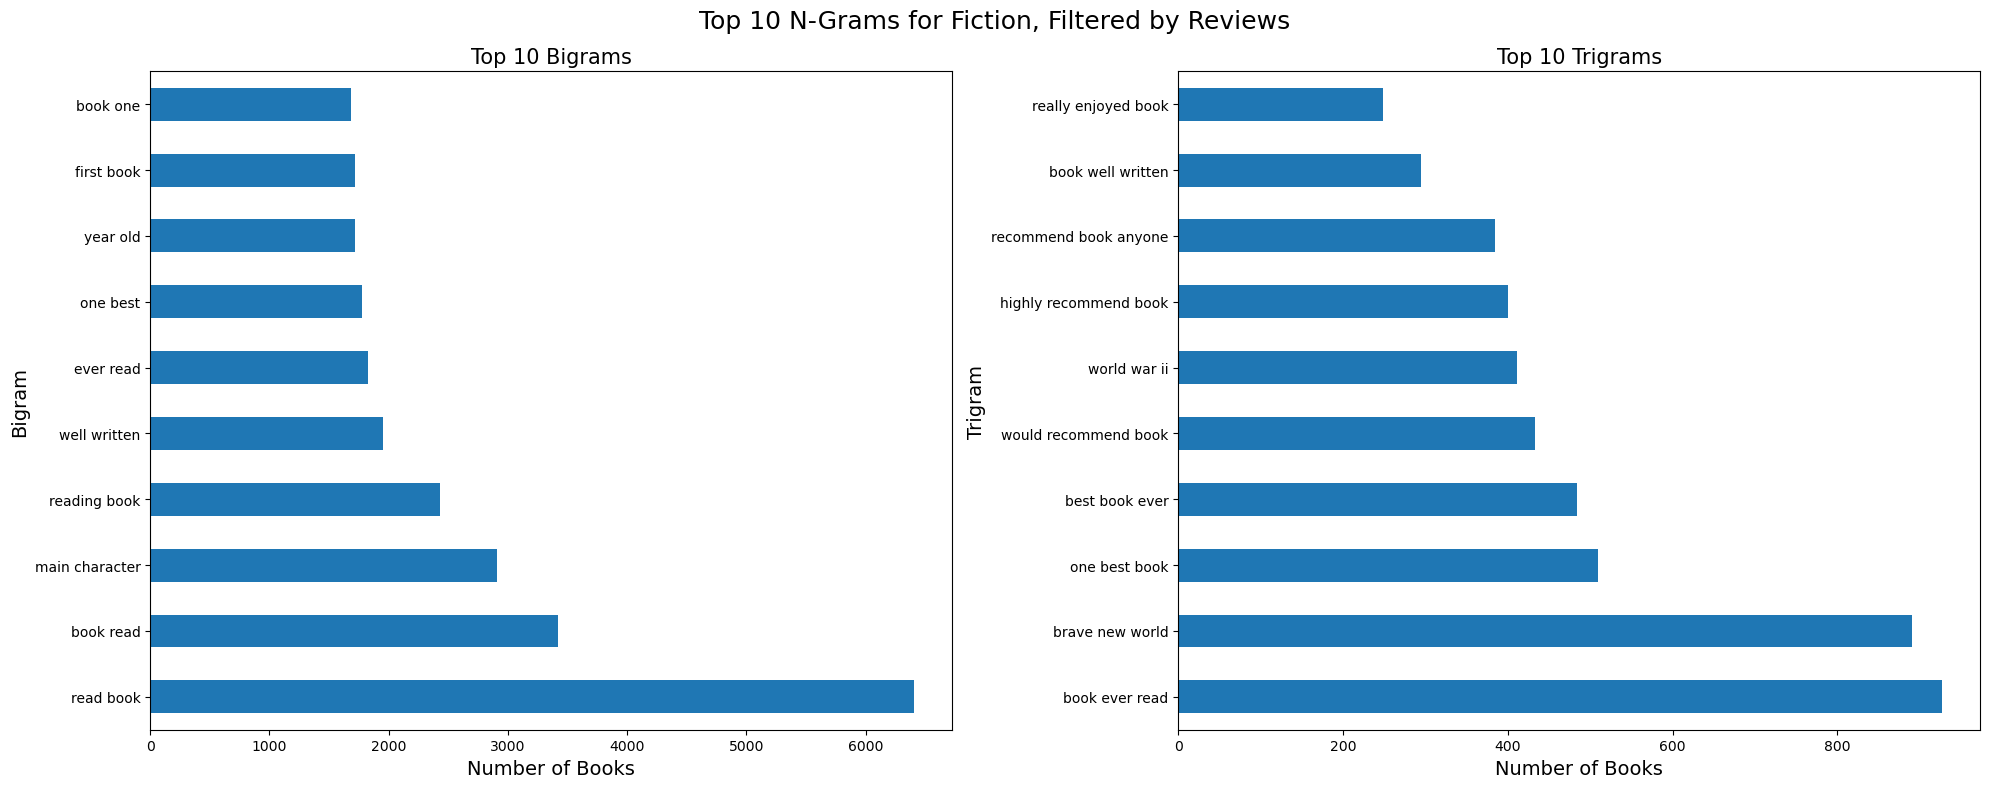

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Fiction, Filtered by Reviews', fontsize = 18)

fic_rev_bigrams = cv_bigram_fic_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
fic_rev_trigrams = cv_trigram_fic_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

fic_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
fic_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

fic_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
fic_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

fic_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
fic_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('./graphs/fiction_rev_ngrams.png')

### Bigrams and Trigrams for Juvenile Fiction Dataset

In [19]:
bigram_jvf_desc = bigram_cvec.fit_transform(jvf_df['description'])
cv_bigram_jvf_desc = pd.DataFrame(bigram_jvf_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_jvf_desc  = trigram_cvec.fit_transform(jvf_df['description'])
cv_trigram_jvf_desc = pd.DataFrame(trigram_jvf_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [20]:
bigram_jvf_rev = bigram_cvec.fit_transform(jvf_df['review/text'])
cv_bigram_jvf_rev = pd.DataFrame(bigram_jvf_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_jvf_rev  = trigram_cvec.fit_transform(jvf_df['review/text'])
cv_trigram_jvf_rev = pd.DataFrame(trigram_jvf_rev.todense(), columns = trigram_cvec.get_feature_names_out())

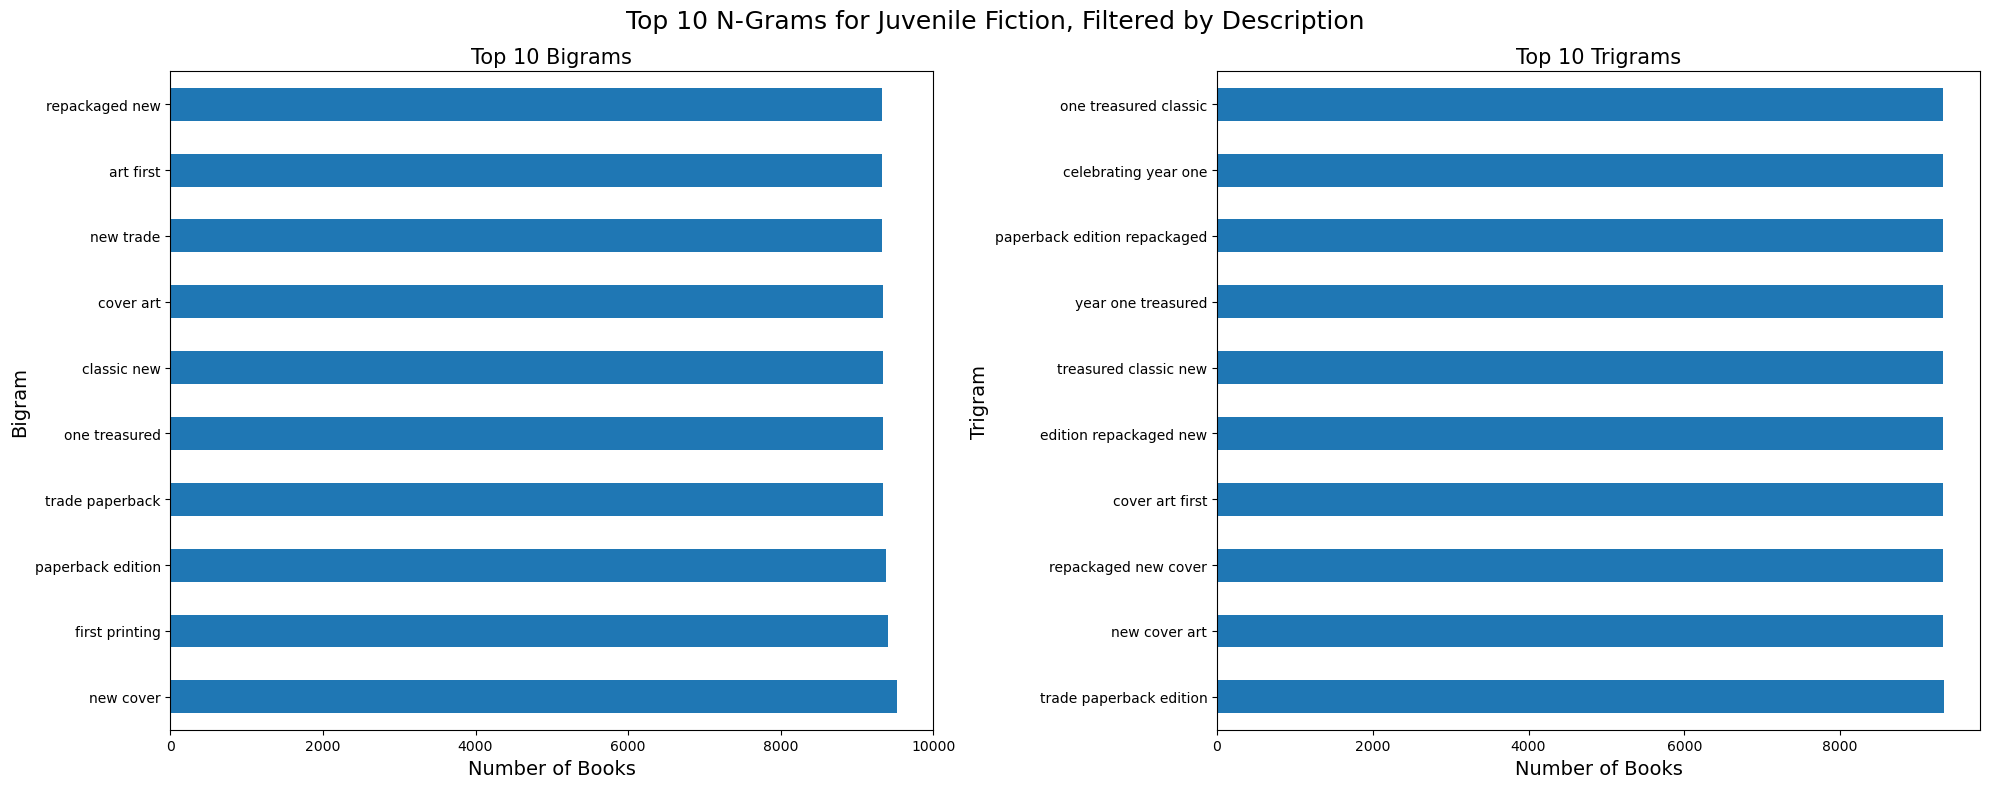

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Juvenile Fiction, Filtered by Description', fontsize = 18)

jvf_desc_bigrams = cv_bigram_jvf_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
jvf_desc_trigrams = cv_trigram_jvf_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

jvf_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
jvf_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

jvf_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
jvf_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

jvf_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
jvf_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('./graphs/jvf_desc_ngrams.png')

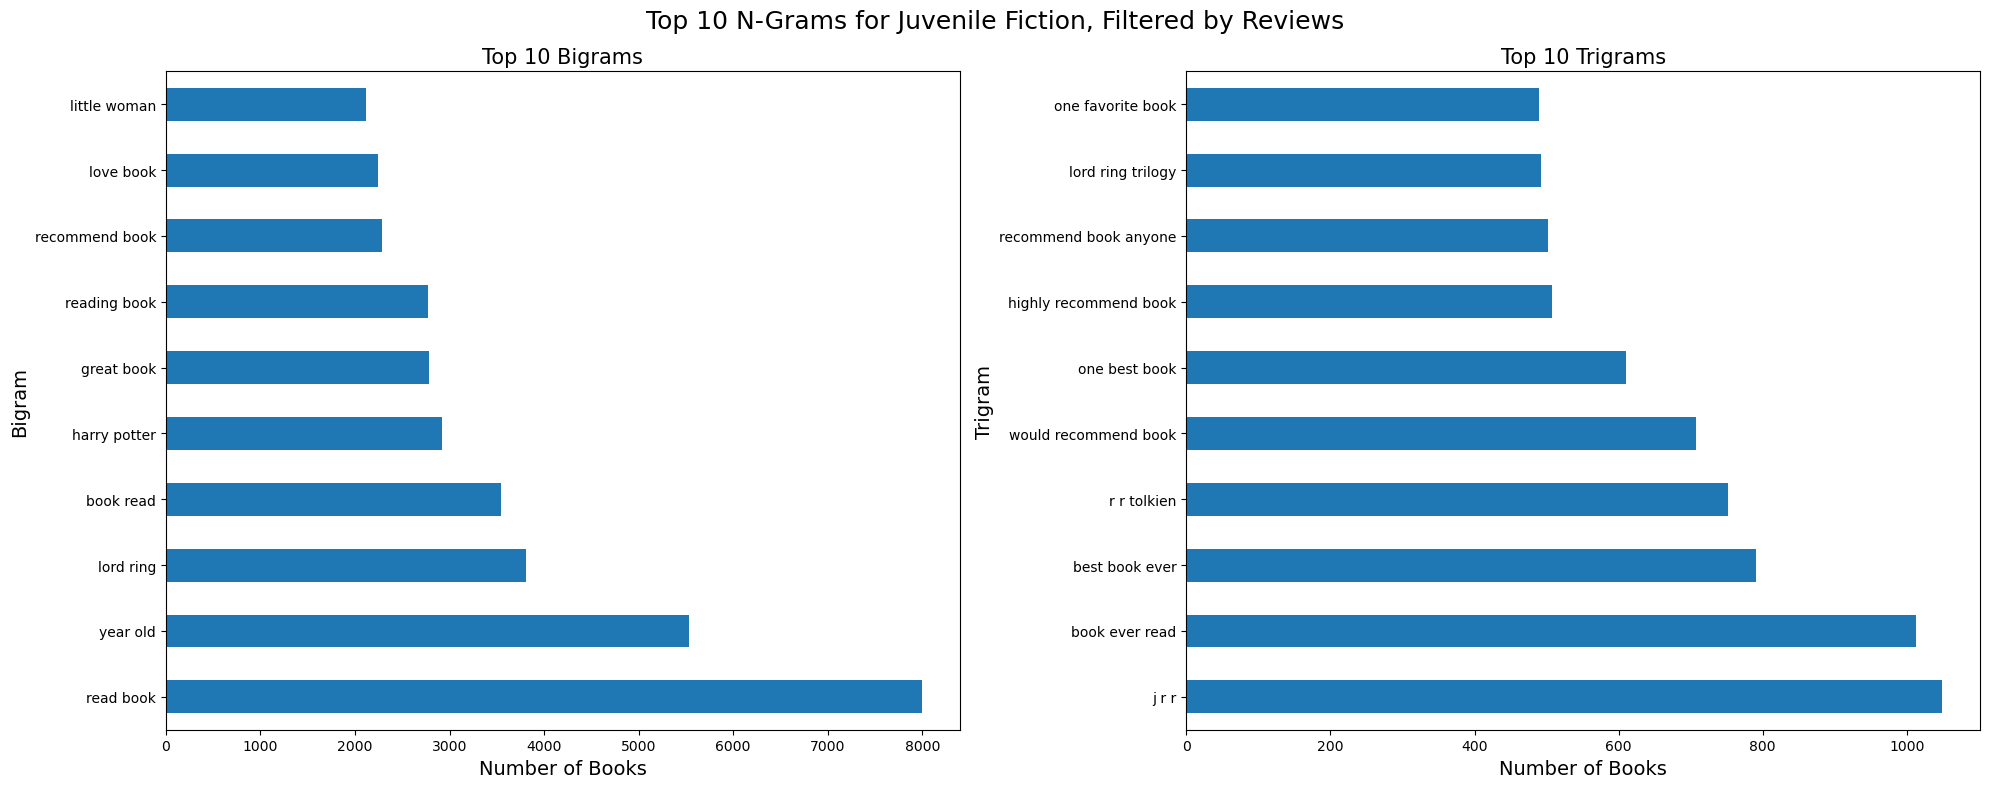

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Juvenile Fiction, Filtered by Reviews', fontsize = 18)

jvf_rev_bigrams = cv_bigram_jvf_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
jvf_rev_trigrams = cv_trigram_jvf_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

jvf_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
jvf_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

jvf_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
jvf_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

jvf_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
jvf_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('./graphs/jvf_rev_ngrams.png')

### Bigrams and Trigrams for Biography & Autobiography Dataset

In [13]:
bigram_bio_desc = bigram_cvec.fit_transform(bio_df['description'])
cv_bigram_bio_desc = pd.DataFrame(bigram_bio_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_bio_desc  = trigram_cvec.fit_transform(bio_df['description'])
cv_trigram_bio_desc = pd.DataFrame(trigram_bio_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [14]:
bigram_bio_rev = bigram_cvec.fit_transform(bio_df['review/text'])
cv_bigram_bio_rev = pd.DataFrame(bigram_bio_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_bio_rev  = trigram_cvec.fit_transform(bio_df['review/text'])
cv_trigram_bio_rev = pd.DataFrame(trigram_bio_rev.todense(), columns = trigram_cvec.get_feature_names_out())

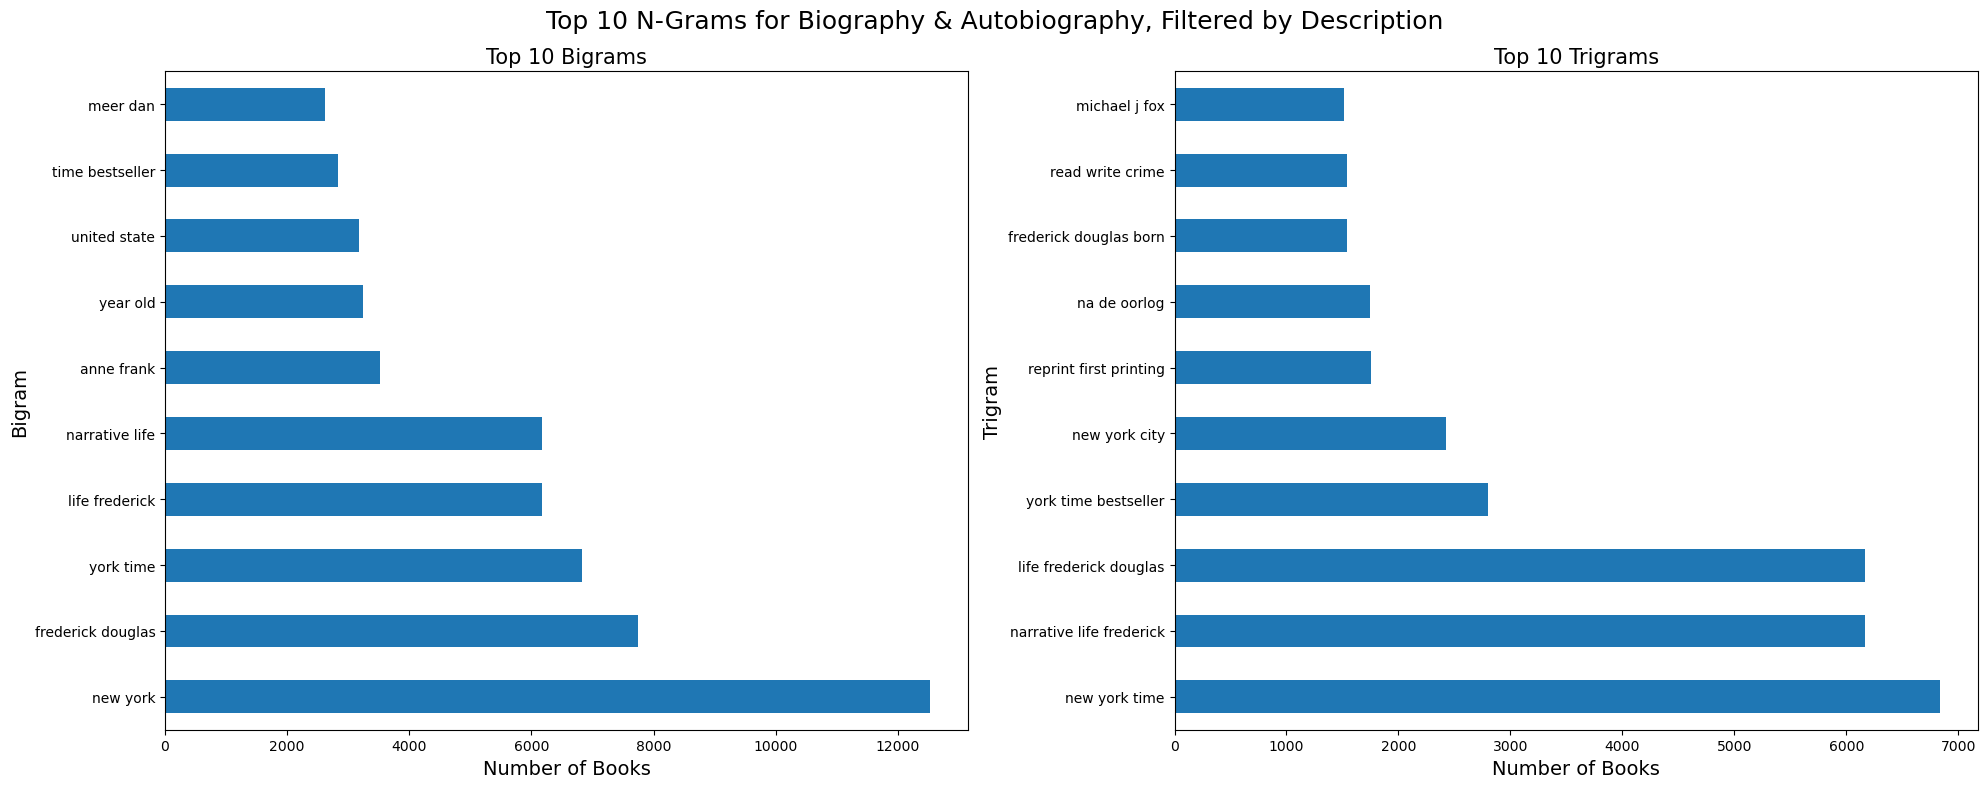

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Biography & Autobiography, Filtered by Description', fontsize = 18)

bio_desc_bigrams = cv_bigram_bio_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
bio_desc_trigrams = cv_trigram_bio_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

bio_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
bio_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

bio_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
bio_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

bio_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
bio_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

plt.tight_layout()
plt.savefig('./graphs/bio_desc_ngrams.png')

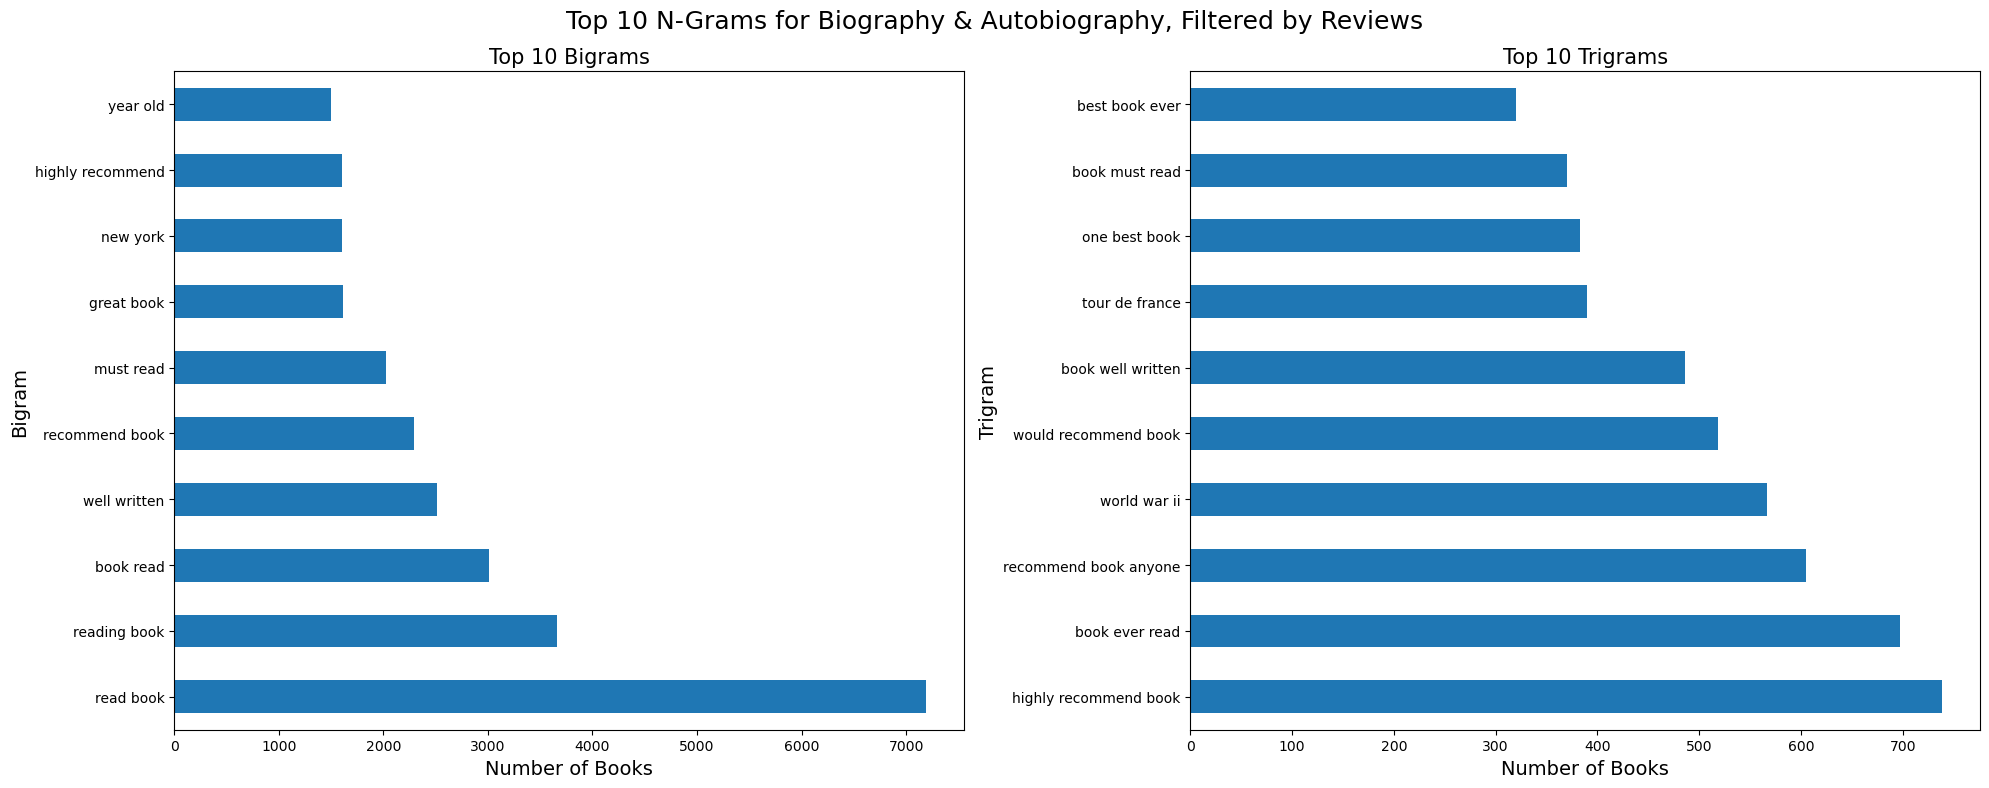

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Biography & Autobiography, Filtered by Reviews', fontsize = 18)

bio_rev_bigrams = cv_bigram_bio_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
bio_rev_trigrams = cv_trigram_bio_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

bio_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
bio_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

bio_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
bio_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

bio_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
bio_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

plt.tight_layout()
plt.savefig('./graphs/bio_rev_ngrams.png')

## Word Clouds

In [17]:
#pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

source: https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/

In [26]:
fiction_text = " ".join(i for i in fiction_df['description'])

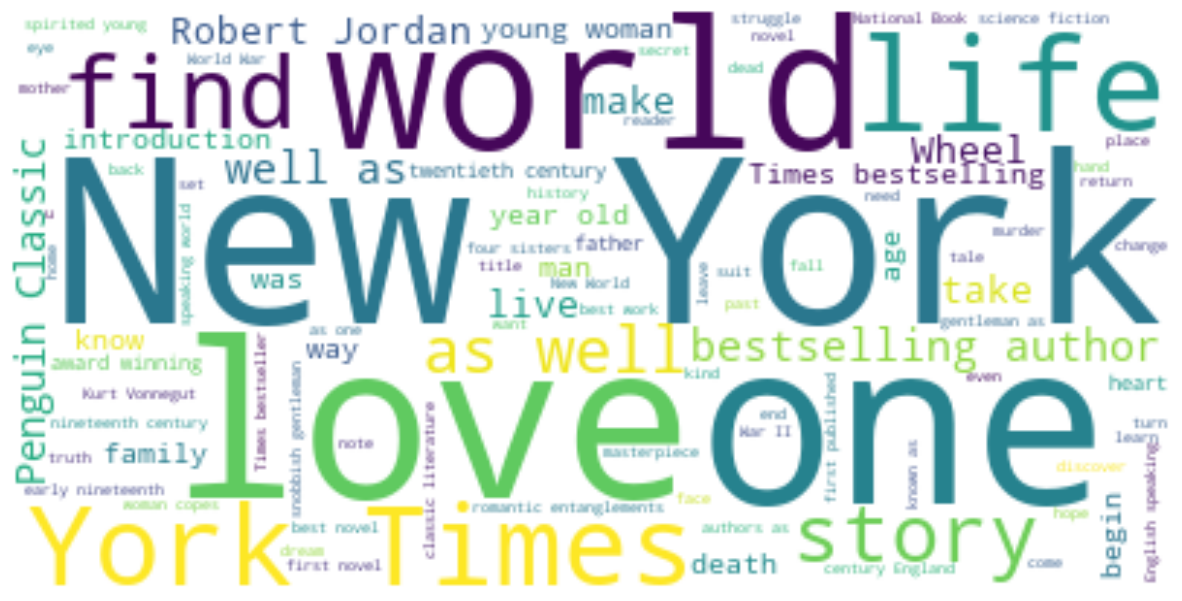

In [31]:
fiction_wc = WordCloud(stopwords = lem_stopwords, background_color = "rgba(255, 255, 255, 0)").generate(fiction_text)

plt.figure(figsize=(15, 10))
plt.imshow(fiction_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

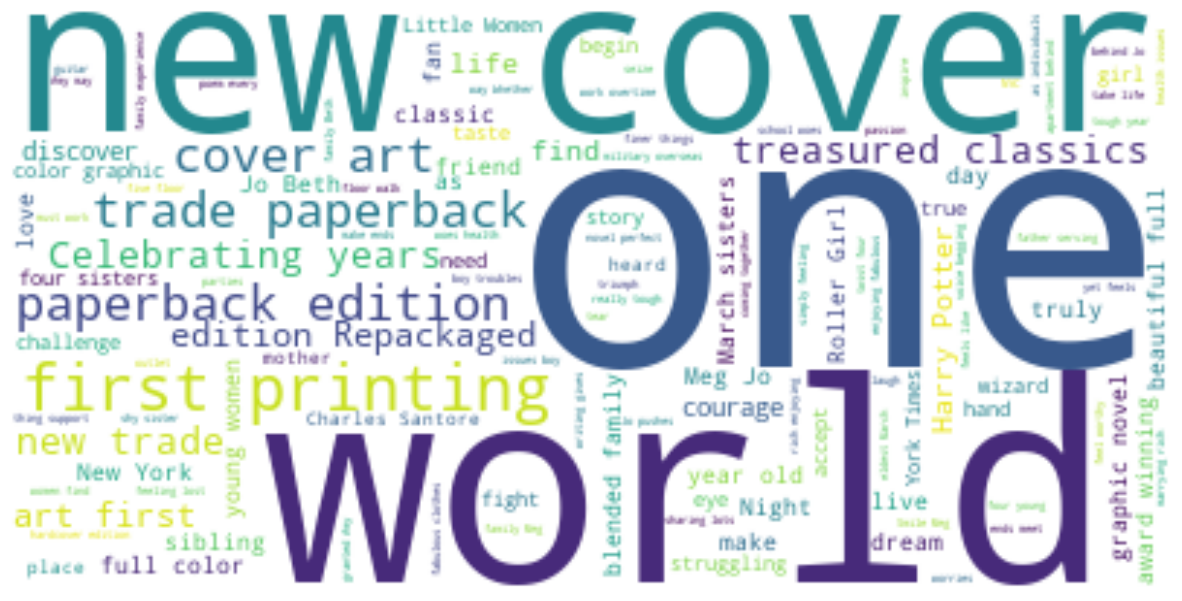

In [32]:
jvf_text = " ".join(i for i in jvf_df['description'])

jvf_wc = WordCloud(stopwords = lem_stopwords, background_color = "rgba(255, 255, 255, 0)").generate(jvf_text)

plt.figure(figsize=(15, 10))
plt.imshow(jvf_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

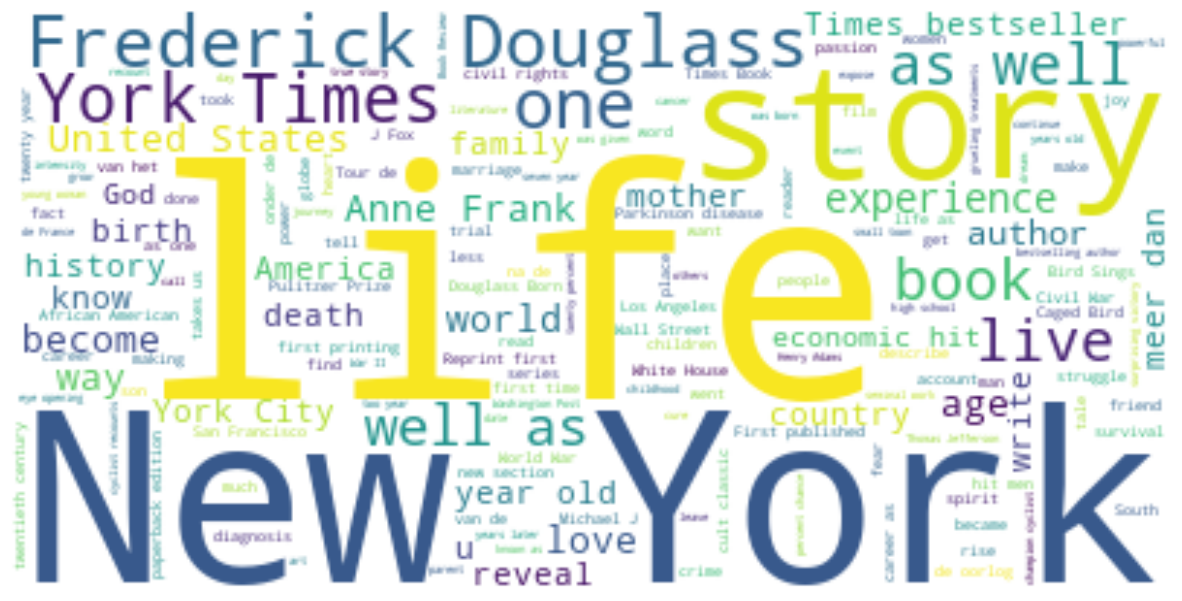

In [38]:
bio_text = " ".join(i for i in bio_df['description'])

bio_wc = WordCloud(stopwords = lem_stopwords, background_color = "rgba(255, 255, 255, 0)").generate(bio_text)

plt.figure(figsize=(15, 10))
plt.imshow(bio_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
sent = SentimentIntensityAnalyzer()
def sentiment_score(text):
    sentiment_score = sent.polarity_scores(text)
    sentiment_value = ''
    
    if sentiment_score['compound'] > 0:
        sentiment_value = 'positive'
    elif sentiment_score['compound'] < 0:
        sentiment_value = 'negative' 
    elif sentiment_score['compound'] == 0:
        sentiment_value = 'neutral'  
 
    return sentiment_value

In [47]:
fiction_df['review_sentiment'] = fiction_df['review/text'].apply(sentiment_score)
jvf_df['review_sentiment'] = jvf_df['review/text'].apply(sentiment_score)
bio_df['review_sentiment'] = bio_df['review/text'].apply(sentiment_score)

In [48]:
fiction_counts = fiction_df['review_sentiment'].value_counts()
jvf_counts = jvf_df['review_sentiment'].value_counts()
bio_counts = bio_df['review_sentiment'].value_counts()

In [ ]:
sentiment_counts = shower['sentiment_score'].value_counts()

plt.figure(figsize = (12,5))
plt.bar(fiction_counts.index, fiction_counts.values, color='orange')

plt.title('Sentiment Analysis of Showerthoughts Reddit', size = 15)
plt.xlabel('Sentiment Score', size = 13)
plt.xticks(fontsize = 15)
plt.ylabel('Number of Posts', size = 13)
plt.yticks(fontsize = 15);

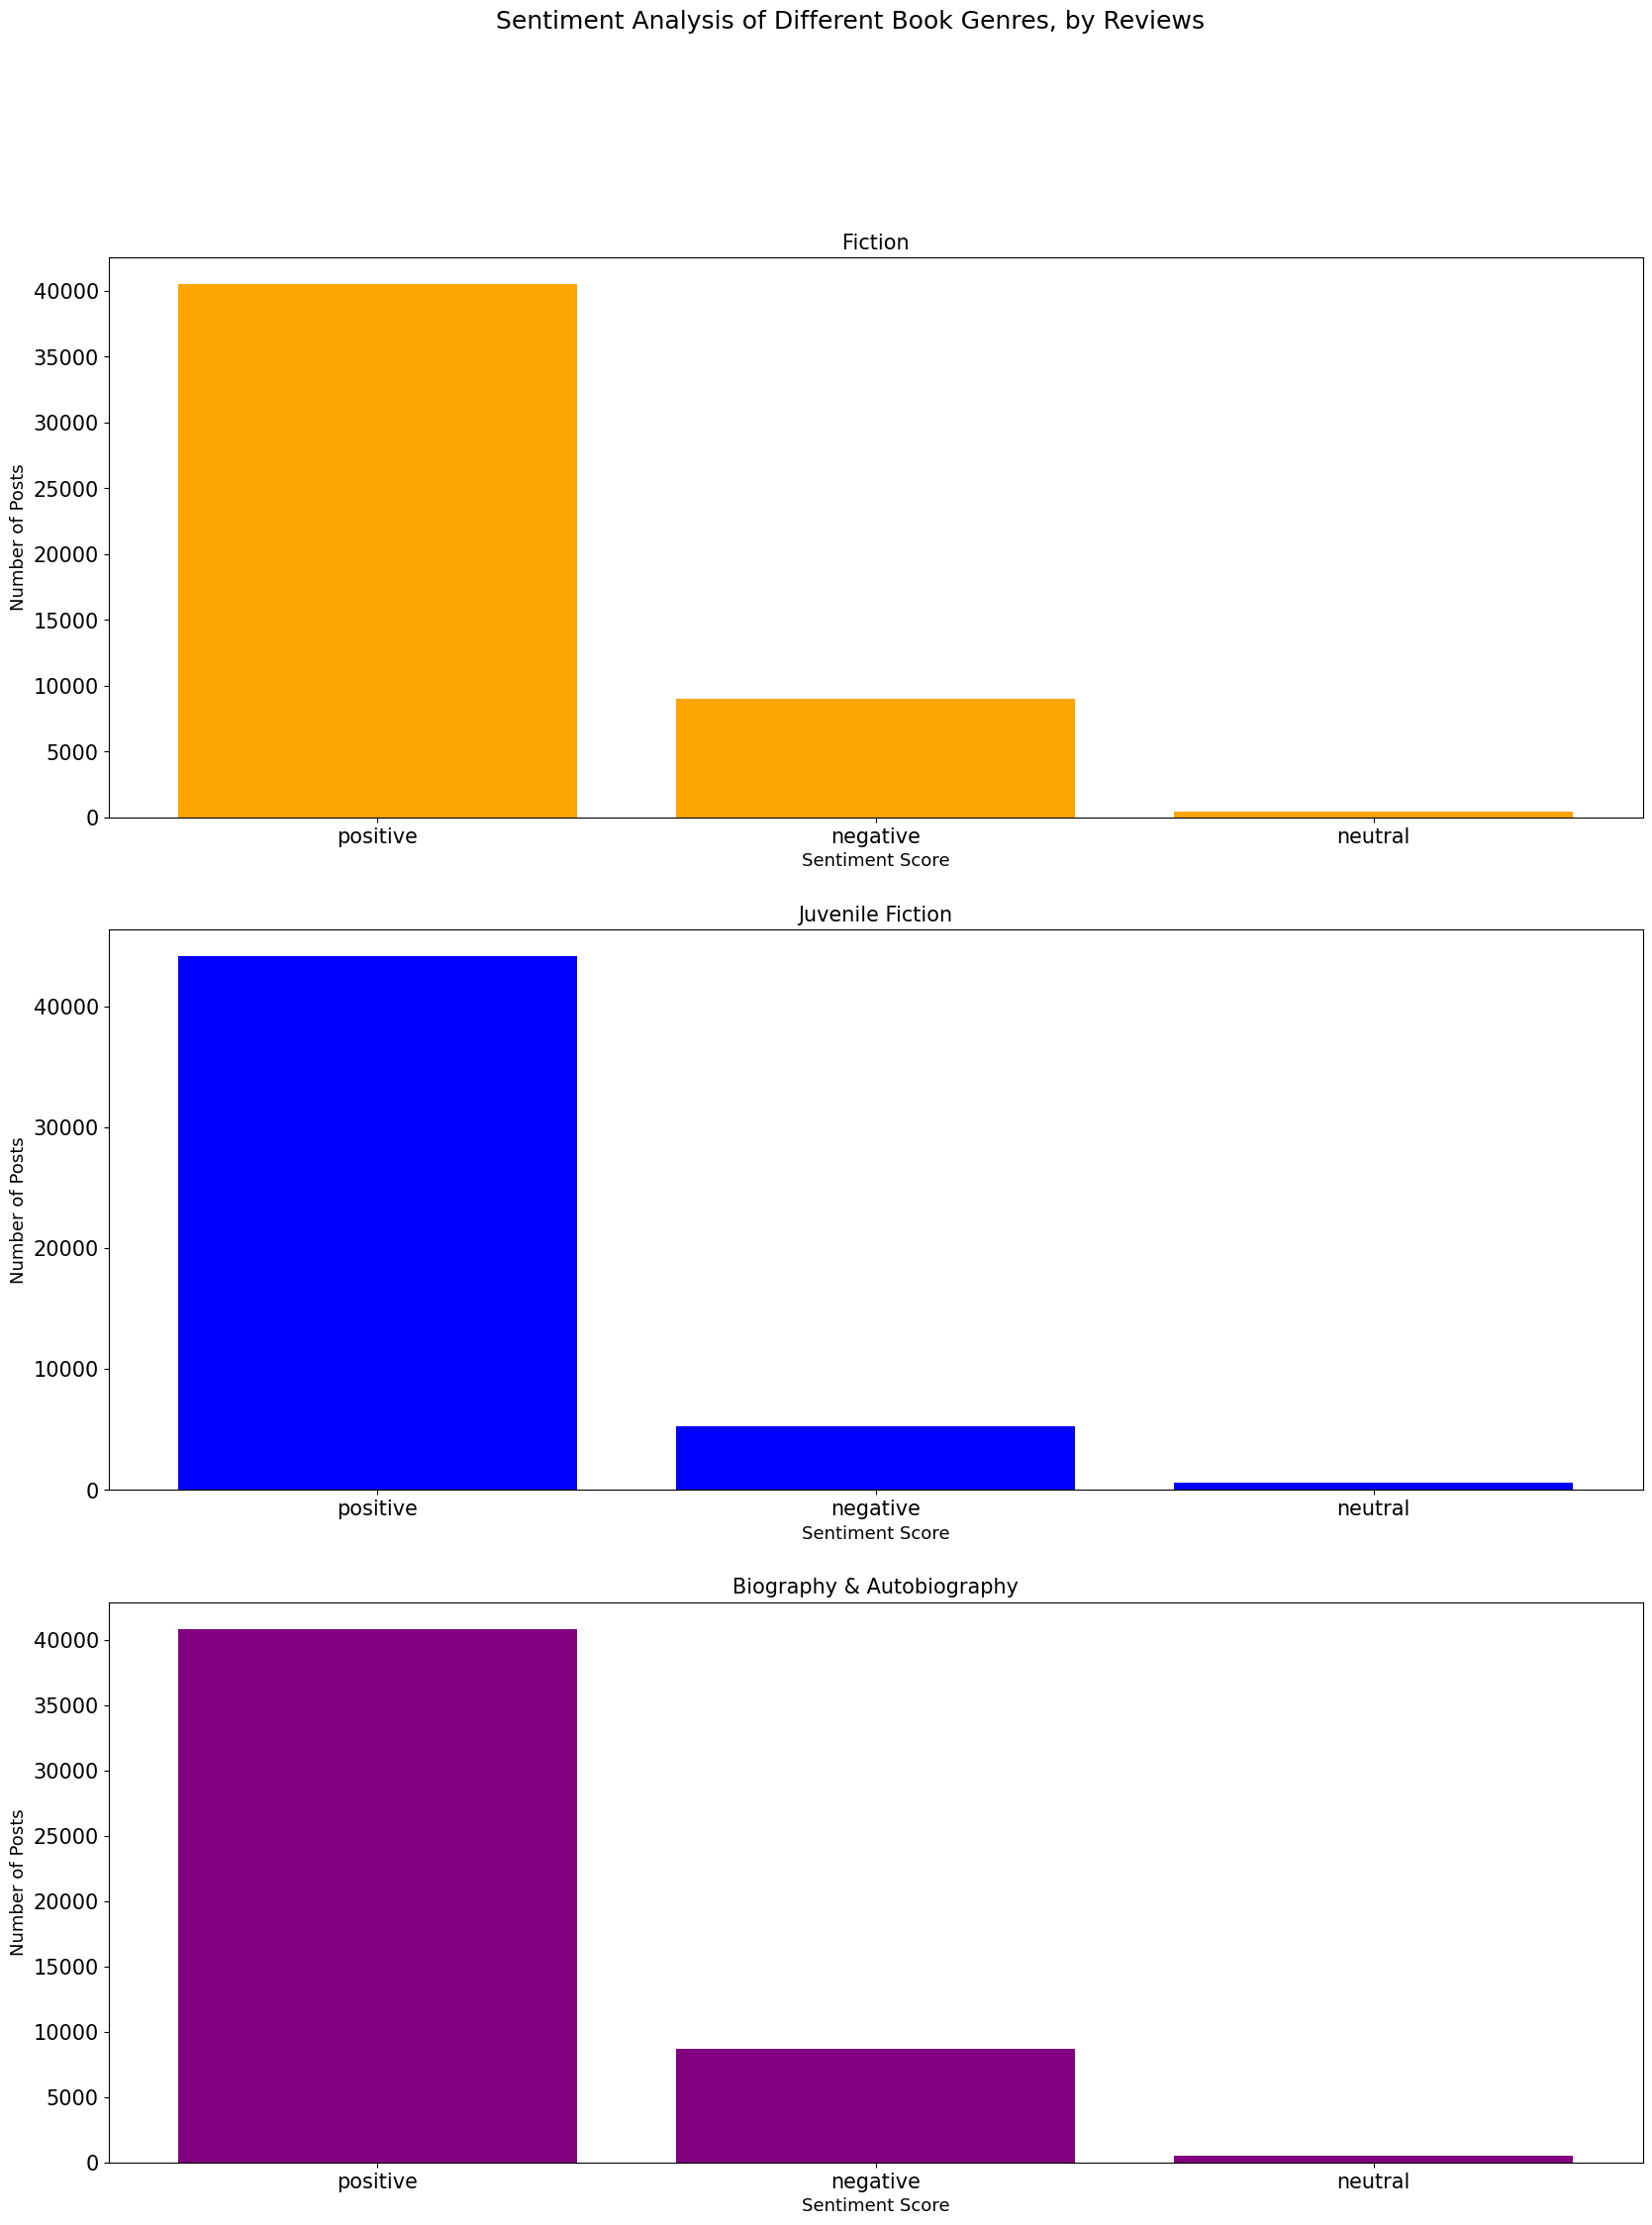

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
fig.suptitle('Sentiment Analysis of Different Book Genres, by Reviews', fontsize=18)

ax[0].bar(fiction_counts.index, fiction_counts.values, color='orange')
ax[0].set_title('Fiction', size=15)
ax[0].set_xlabel('Sentiment Score', size=13)
ax[0].set_ylabel('Number of Posts', size=13)
ax[0].tick_params(axis='both', labelsize=15)

ax[1].bar(jvf_counts.index, jvf_counts.values, color='blue')
ax[1].set_title('Juvenile Fiction', size=15)
ax[1].set_xlabel('Sentiment Score', size=13)
ax[1].set_ylabel('Number of Posts', size=13)
ax[1].tick_params(axis='both', labelsize=15)

ax[2].bar(bio_counts.index, bio_counts.values, color='purple')
ax[2].set_title('Biography & Autobiography', size=15)
ax[2].set_xlabel('Sentiment Score', size=13)
ax[2].set_ylabel('Number of Posts', size=13)
ax[2].tick_params(axis='both', labelsize=15)

In [80]:
print(f'Fiction')
print("---")
print(fiction_counts)
print("---\n")

print(f'Juvenile Fiction')
print("---")
print(jvf_counts)
print("---\n")

print(f'Biography & Autobiography')
print("---")
print(bio_counts)

Fiction
---
positive    40534
negative     8995
neutral       471
Name: review_sentiment, dtype: int64
---

Juvenile Fiction
---
positive    44143
negative     5253
neutral       604
Name: review_sentiment, dtype: int64
---

Biography & Autobiography
---
positive    40834
negative     8663
neutral       503
Name: review_sentiment, dtype: int64
